<a href="https://colab.research.google.com/github/madhu-1013/DS_internship/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Engineering**

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print(df.head())
print(df.info())


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [12]:

print(df.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [13]:
import pandas as pd

# Load the given dataset
df = pd.read_csv('train.csv')

# Preparing X and Y
X = df.drop('Weekly_Sales', axis=1)  # Initialize X by dropping the 'Weekly_Sales' column from df
Y = df['Weekly_Sales']

print(X.head())
print(Y.head())


   Store  Dept        Date  IsHoliday
0      1     1  2010-02-05      False
1      1     1  2010-02-12       True
2      1     1  2010-02-19      False
3      1     1  2010-02-26      False
4      1     1  2010-03-05      False
0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64


In [14]:
#feature engineering 1
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Load the given dataset
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Preparing X and Y
X = df.drop('Weekly_Sales', axis=1)
Y = df['Weekly_Sales']

# Drop any non-numeric columns if present
X = X.select_dtypes(include=[float, int])

# Handle missing values by filling with mean for simplicity
X.fillna(X.mean(), inplace=True)

# Apply SelectKBest to extract the best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X, Y)

# Create a DataFrame with the scores and feature names
dfscores = pd.DataFrame(fit.scores_, columns=["Score"])
dfcolumns = pd.DataFrame(X.columns, columns=["Specs"])
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)

# Display the feature scores
print(featuresScores)

   Specs        Score
0  Store  3082.190335
1   Dept  9444.999393


[0.37113283 0.62886717]


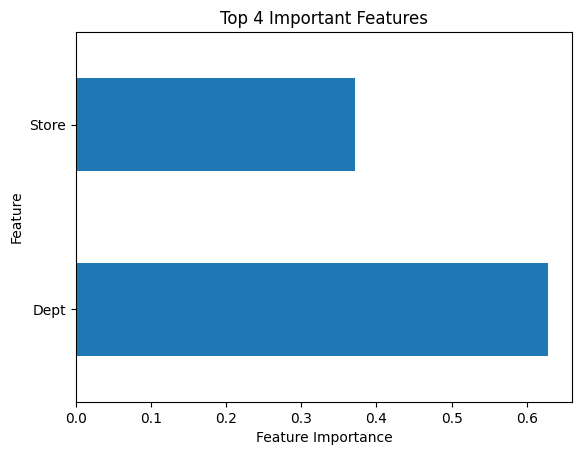

In [15]:
#Feature Selection 2
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor  # Use Regressor for continuous target
import matplotlib.pyplot as plt

# Load the dataset from the uploaded CSV file
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Preparing X and Y
X = df.drop('Weekly_Sales', axis=1)
Y = df['Weekly_Sales']

# Drop any non-numeric columns if present
X = X.select_dtypes(include=[float, int])

# Handle missing values by filling with mean for simplicity
X.fillna(X.mean(), inplace=True)

# Apply ExtraTreesRegressor to identify feature importances for continuous target
model = ExtraTreesRegressor()  # Change to ExtraTreesRegressor
model.fit(X, Y)

# Print feature importances
print(model.feature_importances_)

# Create a series with feature importances
feat_importance = pd.Series(model.feature_importances_, index=X.columns)

# Plot the 4 most important features
feat_importance.nlargest(4).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 4 Important Features')
plt.show()

In [16]:
#Numerical to Categorical
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the uploaded CSV file
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

# Assuming 'Weekly_Sales' is the target variable
X = df.drop(['Weekly_Sales'], axis=1)  # Drop 'Weekly_Sales' column for feature matrix
Y = df['Weekly_Sales']  # Target variable

# If necessary, encode categorical features in the feature matrix X
# Here, we assume there are no categorical features to encode
# You can add encoding steps for any categorical features present in X

# Encoding the target variable 'Weekly_Sales' using LabelEncoder
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

# Replace the original 'Weekly_Sales' column with encoded labels in DataFrame 'df'
df['Weekly_Sales'] = Y_encoded

# Print encoded labels for 'Weekly_Sales' to verify
print(df['Weekly_Sales'].head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
0    274802
1    322211
2    315482
3    250994
4    262838
Name: Weekly_Sales, dtype: int64


In [17]:
#Categorical to Numerical
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the uploaded CSV file
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(df.head())

# Assuming 'Weekly_Sales' is the target variable
X = df.drop(['Weekly_Sales'], axis=1)  # Drop 'Weekly_Sales' column for feature matrix
Y = df['Weekly_Sales']  # Target variable

# Encoding the target variable 'Weekly_Sales' using LabelEncoder
le = LabelEncoder()
le.fit(Y)
Y_encoded = le.transform(Y)

# Replace the original 'Weekly_Sales' column with encoded labels in DataFrame 'df'
df['Weekly_Sales'] = Y_encoded

# Print encoded labels for 'Weekly_Sales' to verify
print(df['Weekly_Sales'].head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
0    274802
1    322211
2    315482
3    250994
4    262838
Name: Weekly_Sales, dtype: int64


In [18]:
#Dealing with missing values
import pandas as pd
import numpy as np

# Load the dataset from the uploaded CSV file
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Display the number of missing values in each column
print("Initial missing values in each column:\n", df.isnull().sum())

# 1. Dropping rows with missing values
# Example: Drop rows with missing values in any column
df.dropna(axis=0, inplace=True)

# 2. Replacing specific values
# Example: Replace specific values in 'Weekly_Sales' column (this is just an example, replace with actual column names if different)
# df['Weekly_Sales'].replace(to_replace='missing_value', value=np.nan, inplace=True) # Uncomment and modify if necessary

# 3. Filling missing values
# Example: Fill missing values in 'CPI' column with the mode (this is just an example, replace with actual column names if different)
# df['CPI'].fillna(df['CPI'].mode()[0], inplace=True) # Uncomment and modify if necessary

# Print the updated DataFrame after handling missing values
print("Missing values after handling:\n", df.isnull().sum())  # Check if there are any remaining missing values

# Display the first few rows to verify changes
print(df.head())


Initial missing values in each column:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Missing values after handling:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [19]:
#Oversampling and Under Sampling

# Check the data type of 'y'
print(y.dtype)

# If 'y' is continuous, consider converting it to categorical if it makes sense for your problem.
# For example, if 'y' represents sales and you want to categorize them into 'High' and 'Low', you could do:
threshold = y.mean()  # Or any other meaningful threshold
y_categorical = (y > threshold).astype(int)  # 1 for 'High', 0 for 'Low'

from collections import Counter
print(Counter(y_categorical)) # Use the categorized 'y' here
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X, y_categorical) # Use the categorized 'y' here
print(Counter(Y))


float64
Counter({0: 4430, 1: 3760})


ValueError: Found input variables with inconsistent numbers of samples: [421570, 8190]

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


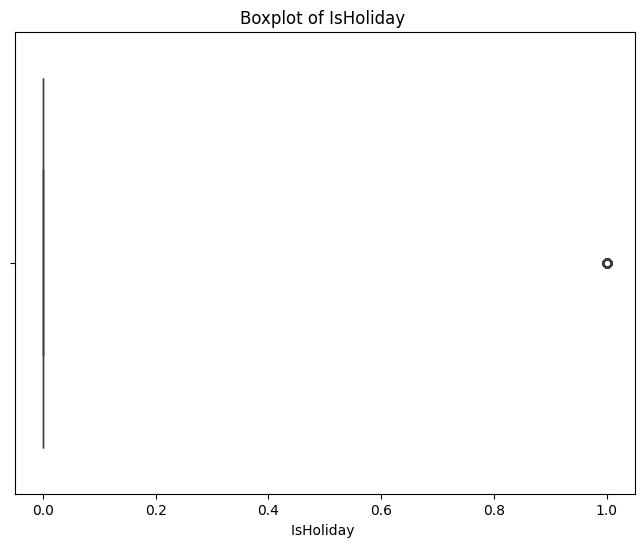

In [24]:
#Identifying Outliers by ploting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('wine_quality.csv')

# Display the first few rows to understand the structure
print(df.head())

# Plotting boxplot for 'alcohol' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['IsHoliday'])
plt.title('Boxplot of IsHoliday ')
plt.xlabel('IsHoliday ')
plt.show()


In [25]:
#Oversampling and Under Sampling
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Assuming X and Y are already defined and loaded with your dataset

# Check if Y is continuous. If so, you might need to convert it to categorical if it represents classes
if Y.dtype in ['float', 'int']:
    print("Warning: Your target variable appears to be continuous. SMOTE is typically used for categorical targets.")
    # Consider converting Y to categorical if appropriate, for example using binning:
    # Y = pd.cut(Y, bins=[0, 10000, 20000, np.inf], labels=[0, 1, 2])  # Adjust bins and labels as needed

# Check class distribution before sampling
print("Before Sampling:")
print(Counter(Y))

# Apply SMOTE only if Y is categorical
if Y.dtype not in ['float', 'int']:
    smote = SMOTE(random_state=0)
    X_resampled, Y_resampled = smote.fit_resample(X, Y)

    # Check class distribution after SMOTE
    print("After SMOTE:")
    print(Counter(Y_resampled))

    # Apply Random Undersampling
    rus = RandomUnderSampler(random_state=0)
    X_resampled, Y_resampled = rus.fit_resample(X_resampled, Y_resampled)

    # Check class distribution after undersampling
    print("After Random Undersampling:")
    print(Counter(Y_resampled))
else:
    print("Skipping SMOTE and undersampling as the target variable is continuous.")


Before Sampling:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


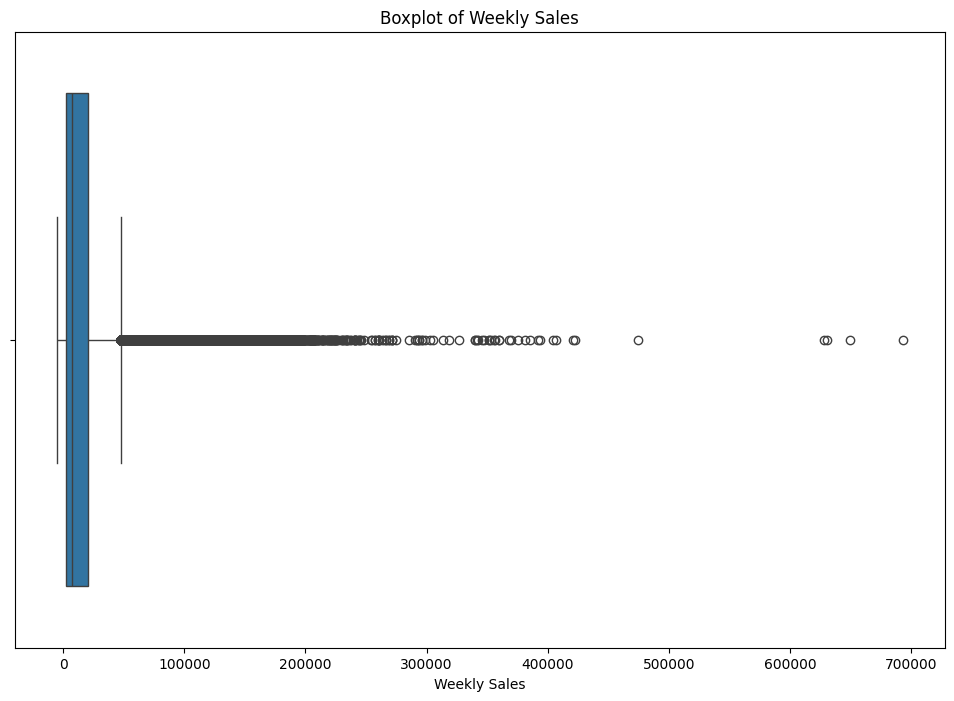

In [26]:
#Identifying Outliers by ploting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('walmart_sales.csv')

# Display the first few rows to understand the structure
print(df.head())

# Plotting boxplot for 'Weekly_Sales' column
plt.figure(figsize=(12, 8))
sns.boxplot(x='Weekly_Sales', data=df)
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.show()

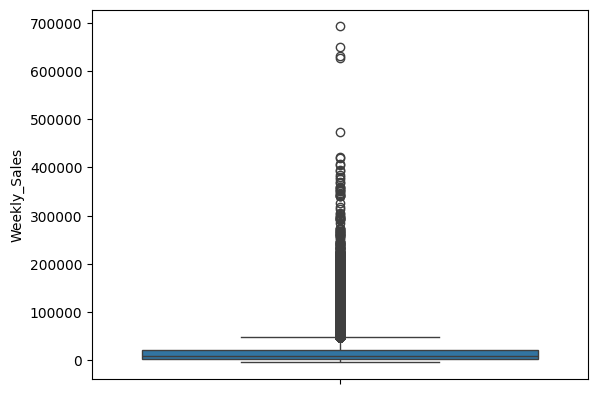

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64
18126.2025
47395.15625
-25109.653749999998
0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64


In [27]:
#3. Dealong with outliers

#identify
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Weekly_Sales'])
plt.show()

print(df['Weekly_Sales'])
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['Weekly_Sales'] < lower].values
out2=df[df['Weekly_Sales'] > upper].values

df['Weekly_Sales'].replace(out1,lower,inplace=True)
df['Weekly_Sales'].replace(out2,upper,inplace=True)

print(df['Weekly_Sales'])


In [28]:
#Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('walmart_sales.csv')

# Display the first few rows to understand the structure
print(df.head())

# Selecting relevant features and target variable
X = df[['Store', 'Dept', 'IsHoliday']]  # Selecting relevant features
Y = df['Weekly_Sales']  # Target variable

# Handling NaN values in the dataset
X.fillna(X.mean(), inplace=True)  # Fill NaN with the mean of each column

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, random_state=0, test_size=0.3)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


<ipython-input-28-f59c2c1fbac7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # Fill NaN with the mean of each column


Original shape: (421570, 3)
Transformed shape: (421570, 2)
R^2 Score: 0.03070213559153523


# **classification**

In [29]:
#1. logistic Regression
import pandas as pd
from sklearn.linear_model import LinearRegression # Use LinearRegression for continuous target
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

# Example loading (replace with your actual dataset loading)
df = pd.read_csv('train.csv') # Removed extra space at the beginning

# Display the first few rows to understand the structure
print(df.head())

# Selecting relevant features and target variable
X = df[['Store', 'Dept', 'IsHoliday']]  # Selecting relevant features
Y = df['Weekly_Sales']  # Target variable

# Handling NaN values in the dataset
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size=0.3)

# Creating a Linear Regression model (suitable for regression with continuous target)
linreg = LinearRegression() # Changed to LinearRegression

# Fitting the model on the training data
linreg.fit(X_train, y_train) # Changed to linreg

# Predicting on the test set
y_pred = linreg.predict(X_test) # Changed to linreg

# Evaluating the model (for regression tasks, we use metrics like R^2 score and RMSE)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R^2 Score:", r2)
print("Root Mean Squared Error:", rmse)

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
R^2 Score: 0.030276680560753166
Root Mean Squared Error: 22431.076286939933


In [30]:
#2. Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score

nb=GaussianNB()

# Convert the target variable to categorical if it's continuous
y_categorical = pd.cut(df['Weekly_Sales'], bins=10, labels=False)  # Adjust 'bins' and 'labels' as needed

# Use X instead of x for features
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, random_state=0,test_size=0.4)

nb.fit(X_train,y_train)

y_pred1=nb.predict(X_test)

print("Naive Bayes: ",accuracy_score(y_test,y_pred1))

Naive Bayes:  0.9556064236069929


In [31]:
# 3. KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=5)

# Use X instead of x for features
X_train,X_test,y_train,y_test=train_test_split(X, y_categorical, random_state=0) # Use X and y_categorical

train=knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9856252312772196


In [32]:
#4. Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt=tree.DecisionTreeClassifier()

# Use X and y_categorical for consistency with previous models
X_train,X_test,y_train,y_test=train_test_split(X, y_categorical, random_state=0,test_size=0.3)

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9867400431719525


In [33]:
# 5. Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

# Use X and y_categorical for consistency with previous models
X_train,X_test,y_train,y_test=train_test_split(X, y_categorical, random_state=0,test_size=0.3) # Changed x to X and y to y_categorical

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.986771670975955


In [34]:
# 6. Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier(n_estimators=10)

# Use X and y_categorical for consistency with previous models
X_train,X_test,y_train,y_test=train_test_split(X, y_categorical, random_state=0,test_size=0.2) # Changed x to X and y to y_categorical

gbm.fit(X_train,y_train)

y_pred=gbm.predict(X_test)

print("GBM: ",accuracy_score(y_test,y_pred))


GBM:  0.9572668833171241


# **visualization**

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('walmart_sales.csv')

# Display the first few rows to understand the structure
print(df.head())

# Preparing X and Y
X = df[['Store', 'Dept', 'Date', 'IsHoliday']]  # Selecting relevant features
Y = df['Weekly_Sales']  # Target variable

print(X)
print(Y)

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
        Store  Dept        Date  IsHoliday
0           1     1  2010-02-05      False
1           1     1  2010-02-12       True
2           1     1  2010-02-19      False
3           1     1  2010-02-26      False
4           1     1  2010-03-05      False
...       ...   ...         ...        ...
421565     45    98  2012-09-28      False
421566     45    98  2012-10-05      False
421567     45    98  2012-10-12      False
421568     45    98  2012-10-19      False
421569     45    98  2012-10-26      False

[421570 rows x 4 columns]
0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


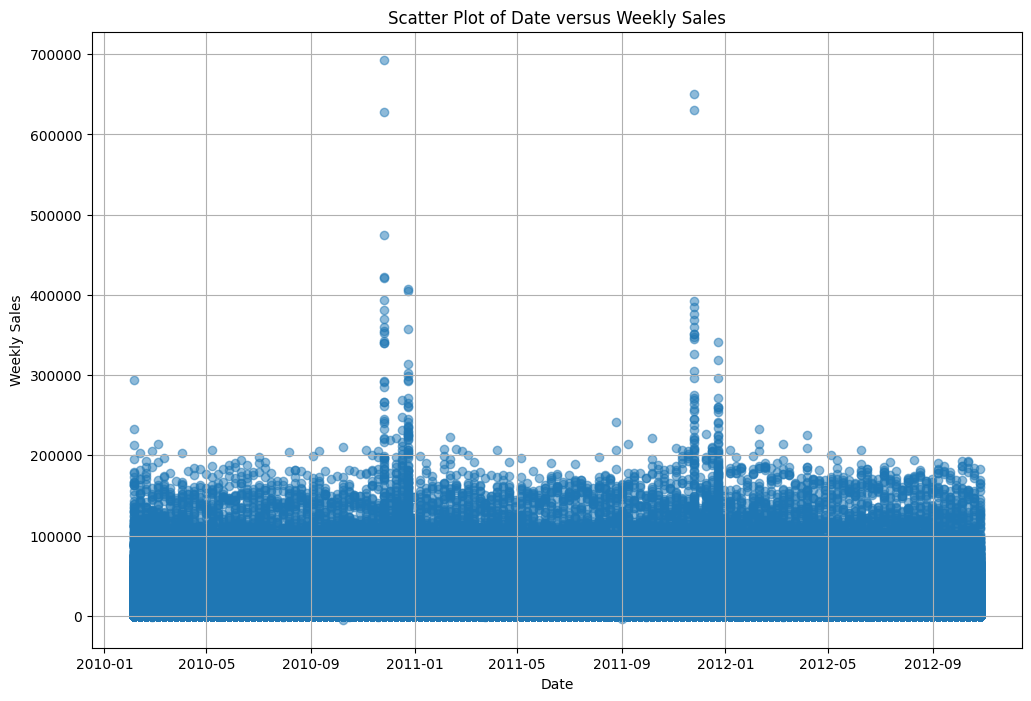

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('walmart_sales.csv')

# Display the first few rows to understand the structure
print(df.head())

# Convert 'Date' column to datetime format if needed
df['Date'] = pd.to_datetime(df['Date'])

# Scatter plot for 'Date' versus 'Weekly_Sales'
plt.figure(figsize=(12, 8))
plt.scatter(df['Date'], df['Weekly_Sales'], alpha=0.5)
plt.title('Scatter Plot of Date versus Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False


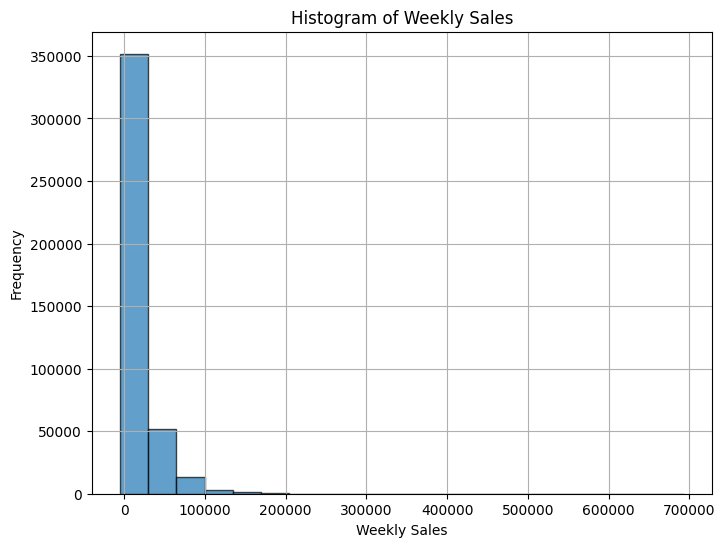

In [37]:
#Histrogram shows the distribution of a continuous variable.  It can discover the frequency distribution for a single variable in a univariate analysis.
import pandas as pd
import matplotlib.pyplot as plt

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('walmart_sales.csv')

# Display the first few rows to understand the structure
print(df.head())

# Histogram plot for 'Weekly_Sales' variable
plt.figure(figsize=(8, 6))
plt.hist(df['Weekly_Sales'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False


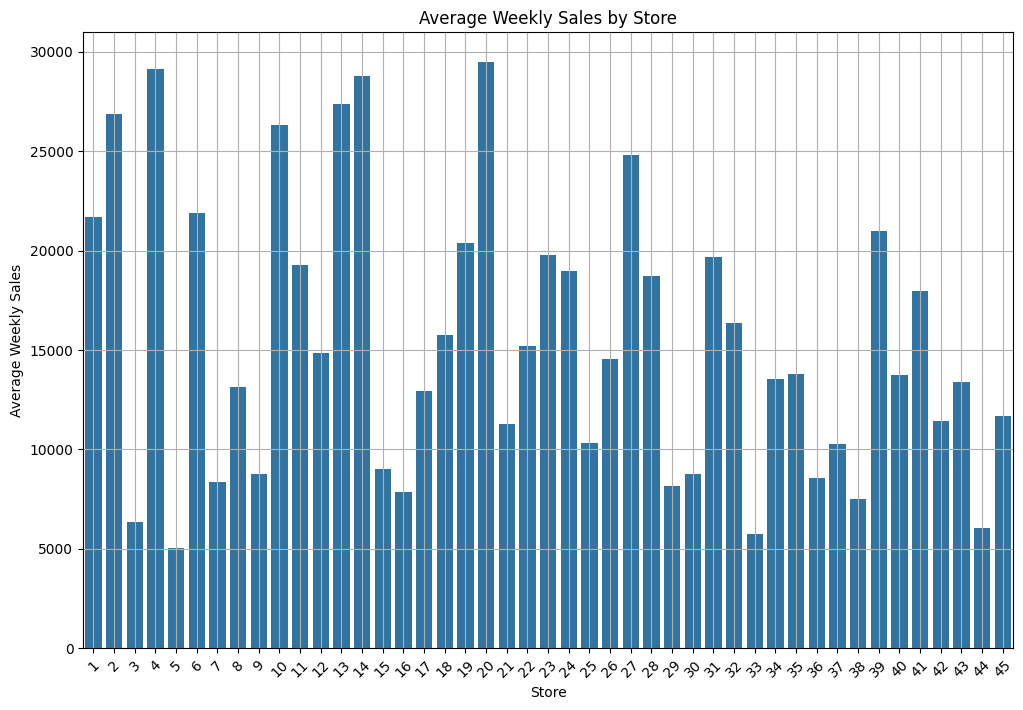

In [38]:
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('walmart_sales.csv')

# Display the first few rows to understand the structure
print(df.head())

# Grouping by 'Store' and calculating mean 'Weekly_Sales'
avg_sales_by_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Bar plot for average 'Weekly_Sales' across 'Store' categories
plt.figure(figsize=(12, 8))
sns.barplot(x='Store', y='Weekly_Sales', data=avg_sales_by_store)
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False


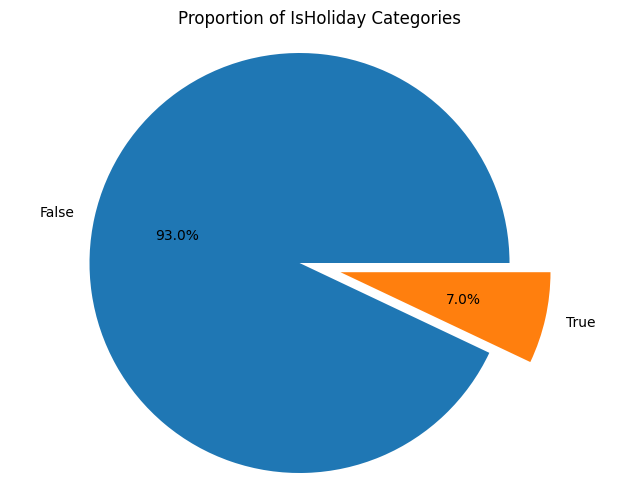

In [39]:
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
import pandas as pd
import matplotlib.pyplot as plt

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('walmart_sales.csv')

# Display the first few rows to understand the structure
print(df.head())

# Counting the frequency of each 'IsHoliday' category
holiday_counts = df['IsHoliday'].value_counts()

# Creating an explode tuple with the correct length
explode = tuple([0.1] * len(holiday_counts))  # Adjust 0.1 to your desired explosion value

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', explode=explode)  # Use the dynamically created explode tuple
plt.title('Proportion of IsHoliday Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False


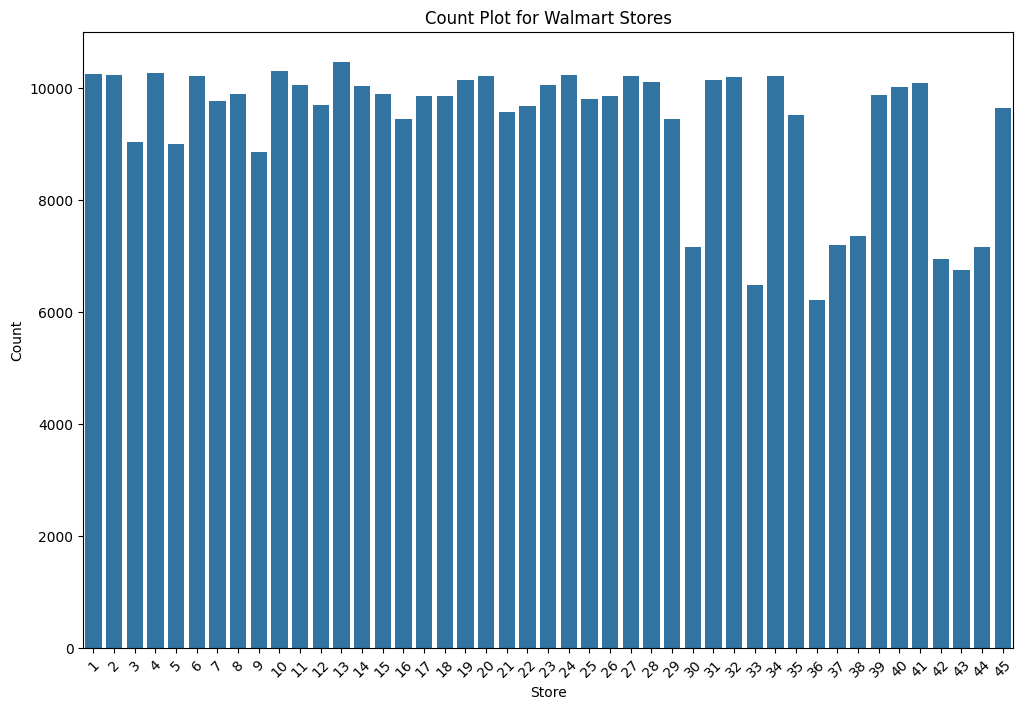

In [40]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('walmart_sales.csv')

# Display the first few rows to understand the structure
print(df.head())

# Plotting the count plot for 'Store' categories
plt.figure(figsize=(12, 8))
sns.countplot(x='Store', data=df)
plt.title('Count Plot for Walmart Stores')
plt.xlabel('Store')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False


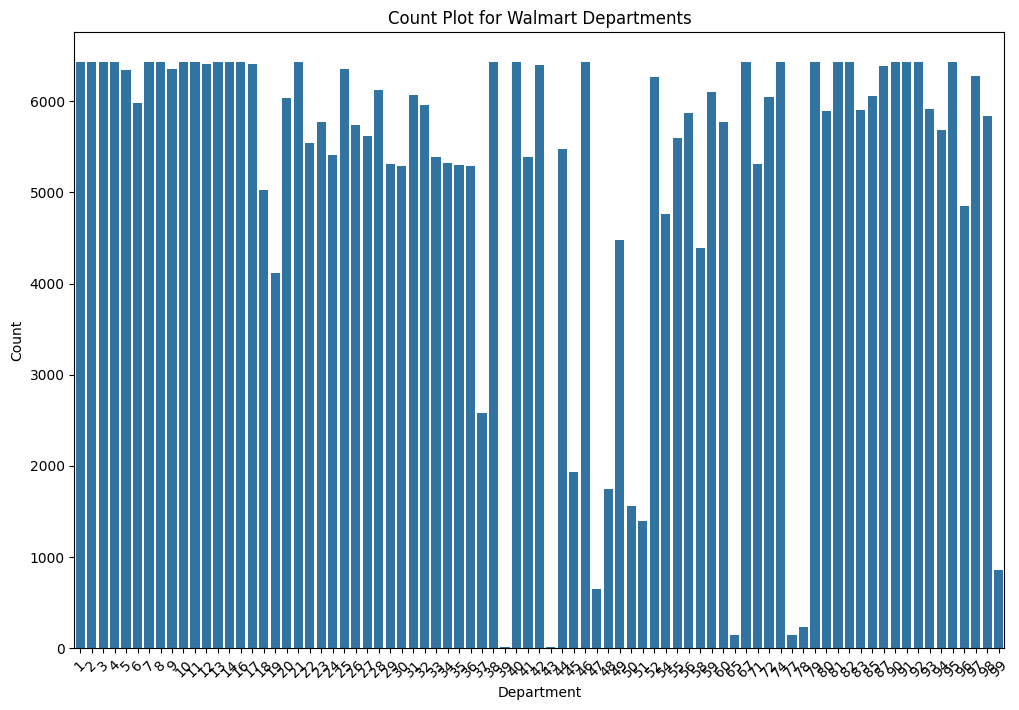

In [41]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('walmart_sales.csv')

# Display the first few rows to understand the structure
print(df.head())

# Plotting the count plot for 'Dept' categories
plt.figure(figsize=(12, 8))
sns.countplot(x='Dept', data=df)
plt.title('Count Plot for Walmart Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()


   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False


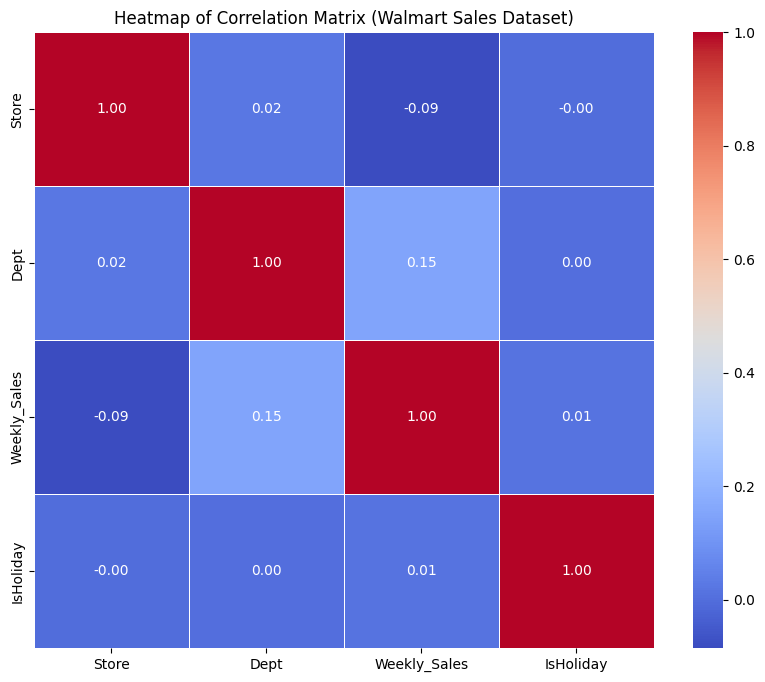

In [42]:
#Heatmap is a type of Matrix plot that allows you to plot data as color-encoded matrices. It is mostly used to find multi-collinearity in a dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example loading (replace with your actual dataset loading)
# df = pd.read_csv('walmart_sales.csv')

# Display the first few rows to understand the structure
print(df.head())

# Selecting relevant numeric columns for correlation calculation
numeric_cols = ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday']  # Adjust with your numeric columns of interest
numeric_df = df[numeric_cols]

# Calculating the correlation matrix for selected numeric columns
correlation_matrix = numeric_df.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Walmart Sales Dataset)')
plt.show()